In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

originalMilestone = pd.read_excel('Milestone Sheet 2019 complete v01_edited.xlsx')

In [2]:
originalMilestone

GMAN Airline GMAN Turnaround Type AODB| DEP Flight Number  \
0              BAW                 BOTH                  BA3271   
1              BAW                 BOTH                  BA4451   
2              LGL                 BOTH                  LG4592   
3              KLM                 BOTH                   KL982   
4              DLH                 BOTH                   LH927   
...            ...                  ...                     ...   
27306          SWR                 BOTH                   LX447   
27307          KLM                 BOTH                   KL992   
27308          EIN                 BOTH                   EI291   
27309          KLM                 BOTH                   KL998   
27310          KLM                 BOTH                   KL980   

      GMAN Aircraft Type MASTER_CALENDAR Month GMAN Scheduled In-Block Time  \
0                   E170                   Apr          2019-04-01 06:55:00   
1                   E190                   Apr          2019-04-01 07:00:00   
2                   DH8D                   Apr          2019-04-01 07:05:00   
3                   E190                   Apr          2019-04-01 07:15:00   
4                   E190                   Apr          2019-04-01 07:15:00   
...                  ...                   ...                          ...   
27306               BCS1                   Dec          2019-12-31 17:50:00   
27307               E190                   Dec          2019-12-31 18:25:00   
27308               RJ85                   Dec          2019-12-31 19:30:00   
27309               E190                   Dec          2019-12-31 19:35:00   
27310               E190                   Dec          2019-12-31 20:15:00   

      GMAN Estimated In-Block Time GMAN Actual In-Block Time  \
0              2019-04-01 06:38:00       2019-04-01 06:44:00   
1              2019-04-01 06:46:00       2019-04-01 06:51:00   
2              2019-04-01 06:57:00       2019-04-01 07:01:00   
3              2019-04-01 07:03:00       2019-04-01 07:06:00   
4              2019-04-01 07:06:00       2019-04-01 07:11:00   
...                            ...                       ...   
27306          2019-12-31 17:29:00       2019-12-31 17:35:00   
27307          2019-12-31 18:01:00       2019-12-31 18:06:00   
27308          2019-12-31 19:02:00       2019-12-31 19:08:00   
27309          2019-12-31 19:13:00       2019-12-31 19:18:00   
27310          2019-12-31 20:03:00       2019-12-31 20:08:00   

      GMAN Scheduled Off-Block Time GMAN Estimated Off-Block Time  ...  Year  \
0               2019-04-01 07:30:00           2019-04-01 08:00:00  ...  2019   
1               2019-04-01 07:35:00           2019-04-01 07:35:00  ...  2019   
2               2019-04-01 07:35:00           2019-04-01 07:40:00  ...  2019   
3               2019-04-01 07:45:00           2019-04-01 07:45:00  ...  2019   
4               2019-04-01 07:50:00           2019-04-01 07:50:00  ...  2019   
...                             ...                           ...  ...   ...   
27306           2019-12-31 18:25:00           2019-12-31 18:25:00  ...  2019   
27307           2019-12-31 18:55:00           2019-12-31 18:55:00  ...  2019   
27308           2019-12-31 20:00:00           2019-12-31 20:00:00  ...  2019   
27309           2019-12-31 20:05:00           2019-12-31 20:05:00  ...  2019   
27310           2019-12-31 20:45:00           2019-12-31 20:45:00  ...  2019   

      Unnamed: 96 Unnamed: 97 Unnamed: 98 Unnamed: 99 2019-03-30 23:00:00  \
0             NaN         NaN         NaN         NaN 2019-10-26 22:59:00   
1             NaN         NaN         NaN         NaN                 NaT   
2             NaN         NaN         NaN         NaN                 NaT   
3             NaN         NaN         NaN         NaN                 NaT   
4             NaN         NaN         NaN         NaN                 NaT   
...           ...         ...         ...         ...       

In [3]:
#data preprocessing
origiTimeMilestone = originalMilestone[['GMAN Airline', 'GMAN Aircraft Type', 'MASTER_CALENDAR Month','GMAN Scheduled In-Block Time',
                                        'GMAN Estimated In-Block Time', 'GMAN Actual In-Block Time', 'Arrival Delay','Schedule Turn', 
                                        'Estimated Turn Time(AIBT_EOBT)', 'First Pax Off','Last Pax Off','First Bag Off',
                                        'Last Bag Off','Catering Start','Catering Stop','Cleaning Start',
                                        'Cleaning Stop','Fuelling Start','Fuelling Stop','First Bag On',
                                        'Last Bag On','First Pax On','Last Pax On', 'TOBT Accuracy', 'AOBT']]

origiTimeMilestone = origiTimeMilestone.dropna(subset=['TOBT Accuracy'])

timeMilestone = origiTimeMilestone.fillna(0)

timeMilestone = timeMilestone.drop(timeMilestone[(timeMilestone['AOBT']<=20.0)|(timeMilestone['AOBT']>60.0)].index)
timeMilestone



GMAN Airline GMAN Aircraft Type MASTER_CALENDAR Month  \
1              BAW               E190                   Apr   
2              LGL               DH8D                   Apr   
3              KLM               E190                   Apr   
4              DLH               E190                   Apr   
5              BAW               E170                   Apr   
...            ...                ...                   ...   
27306          SWR               BCS1                   Dec   
27307          KLM               E190                   Dec   
27308          EIN               RJ85                   Dec   
27309          KLM               E190                   Dec   
27310          KLM               E190                   Dec   

      GMAN Scheduled In-Block Time GMAN Estimated In-Block Time  \
1              2019-04-01 07:00:00          2019-04-01 06:46:00   
2              2019-04-01 07:05:00          2019-04-01 06:57:00   
3              2019-04-01 07:15:00          2019-04-01 07:03:00   
4              2019-04-01 07:15:00          2019-04-01 07:06:00   
5              2019-04-01 07:20:00          2019-04-01 07:21:00   
...                            ...                          ...   
27306          2019-12-31 17:50:00          2019-12-31 17:29:00   
27307          2019-12-31 18:25:00          2019-12-31 18:01:00   
27308          2019-12-31 19:30:00          2019-12-31 19:02:00   
27309          2019-12-31 19:35:00          2019-12-31 19:13:00   
27310          2019-12-31 20:15:00          2019-12-31 20:03:00   

      GMAN Actual In-Block Time  Arrival Delay  Schedule Turn  \
1           2019-04-01 06:51:00           -9.0             35   
2           2019-04-01 07:01:00           -4.0             30   
3           2019-04-01 07:06:00           -9.0             30   
4           2019-04-01 07:11:00           -4.0             35   
5           2019-04-01 07:27:00            7.0             35   
...                         ...            ...            ...   
27306       2019-12-31 17:35:00          -15.0             35   
27307       2019-12-31 18:06:00          -19.0             30   
27308       2019-12-31 19:08:00          -22.0             30   
27309       2019-12-31 19:18:00          -17.0             30   
27310       2019-12-31 20:08:00           -7.0             30   

       Estimated Turn Time(AIBT_EOBT)  First Pax Off  ...  Cleaning Start  \
1                                44.0           14.0  ...            15.0   
2                                39.0           12.0  ...            14.0   
3                                39.0            7.0  ...             0.0   
4                                39.0            3.0  ...             0.0   
5                                30.0            5.0  ...             8.0   
...                               ...            ...  ...             ...   
27306                            50.0            4.0  ...            11.0   
27307                            49.0            6.0  ...             0.0   
27308                            52.0            2.0  ...             0.0   
27309                            47.0            3.0  ...             0.0   
27310                            37.0            4.0  ...             0.0   

       Cleaning Stop  Fuelling Start  Fuelling Stop  First Bag On  \
1               21.0            15.0           21.0          14.0   
2               16.0             0.0            0.0          15.0   
3               16.0             0.0            0.0           0.0   
4                0.0             0.0            0.0          12.0   
5               14.0             0.0            0.0           0.0   
...              ...             ...            ...           ...   
27306           20.0            11.0           18.0          15.0   
27307           19.0             0.0            0.0          19.0   
27308            0.0             0.0            0.0           6.0   
27309            0.0             0.0            

In [4]:
#data preprocessing
subProcessDurDic ={'Deplaning': timeMilestone['Last Pax Off']-timeMilestone['First Pax Off'],
               'Unloading': timeMilestone['Last Bag Off']-timeMilestone['First Bag Off'],
               'Catering': timeMilestone['Catering Stop']-timeMilestone['Catering Start'],
               'Cleaning': timeMilestone['Cleaning Stop']-timeMilestone['Cleaning Start'],
               'Fuelling': timeMilestone['Fuelling Stop']-timeMilestone['Fuelling Start'],
               'Loading': timeMilestone['Last Bag On']-timeMilestone['First Bag On'],
               'Boarding': timeMilestone['Last Pax On']-timeMilestone['First Pax On'],
               'AOBT': timeMilestone['AOBT']}
subProcessDur = pd.DataFrame(subProcessDurDic)

subProcessDur[subProcessDur<0] = 0

# subProcessDur = subProcessDur.drop(subProcessDur[(subProcessDur['Deplaning']==0)|(subProcessDur['Unloading']==0)
#                                                 |(subProcessDur['Catering']==0)|(subProcessDur['Cleaning']==0)
#                                                 |(subProcessDur['Fuelling']==0)|(subProcessDur['Loading']==0)
#                                                 |(subProcessDur['Boarding']==0)].index)



# #count subprocess data numbers
# SizeDeplaning= subProcessDur['Deplaning'][subProcessDur['Deplaning']!=0].value_counts()
# SizeUnloading=subProcessDur['Unloading'][subProcessDur['Unloading']!=0].value_counts()
# SizeCatering=subProcessDur['Catering'][subProcessDur['Catering']!=0].value_counts()
# SizeCleaning=subProcessDur['Cleaning'][subProcessDur['Cleaning']!=0].value_counts()
# SizeFuelling=subProcessDur['Fuelling'][subProcessDur['Fuelling']!=0].value_counts()
# SizeLoading=subProcessDur['Loading'][subProcessDur['Loading']!=0].value_counts()
# SizeBoarding=subProcessDur['Boarding'][subProcessDur['Boarding']!=0].value_counts()
# print(SizeDeplaning)
# print(SizeUnloading)
# print(SizeCatering)
# print(SizeCleaning)
# print(SizeFuelling)
# print(SizeLoading)
# print(SizeBoarding)

#cal subprocess mean (or median) # also or mode, e.g., DeplaningMode=subProcessDur['Deplaning'][subProcessDur['Deplaning']!=0].mode()[0]

DeplaningMean=subProcessDur['Deplaning'].mean()
UnloadingMean=subProcessDur['Unloading'][subProcessDur['Unloading']!=0].mean()
CateringMean=subProcessDur['Catering'][subProcessDur['Catering']!=0].mean()
CleaningMean=subProcessDur['Cleaning'][subProcessDur['Cleaning']!=0].mean()
FuellingMean=subProcessDur['Fuelling'][subProcessDur['Fuelling']!=0].mean()
LoadingMean=subProcessDur['Loading'][subProcessDur['Loading']!=0].mean()
BoardingMean=subProcessDur['Boarding'][subProcessDur['Boarding']!=0].mean()


#replace the 0 with mean value, because raw data has too much loss recording
subProcessDur = subProcessDur.replace({'Deplaning':{0.0:DeplaningMean}})
subProcessDur = subProcessDur.replace({'Unloading':{0.0:UnloadingMean}})
subProcessDur = subProcessDur.replace({'Catering':{0.0:CateringMean}})
subProcessDur = subProcessDur.replace({'Cleaning':{0.0:CleaningMean}})
subProcessDur = subProcessDur.replace({'Fuelling':{0.0:FuellingMean}})
subProcessDur = subProcessDur.replace({'Loading':{0.0:LoadingMean}})
subProcessDur = subProcessDur.replace({'Boarding':{0.0:BoardingMean}})


# #cal subprocess median (or mean)
# DeplaningMedian=subProcessDur['Deplaning'][subProcessDur['Deplaning']!=0].median()
# UnloadingMedian=subProcessDur['Unloading'][subProcessDur['Unloading']!=0].median()
# CateringMedian=subProcessDur['Catering'][subProcessDur['Catering']!=0].median()
# CleaningMedian=subProcessDur['Cleaning'][subProcessDur['Cleaning']!=0].median()
# FuellingMedian=subProcessDur['Fuelling'][subProcessDur['Fuelling']!=0].median()
# LoadingMedian=subProcessDur['Loading'][subProcessDur['Loading']!=0].median()
# BoardingMedian=subProcessDur['Boarding'][subProcessDur['Boarding']!=0].median()


# #replace the 0 with median value, because raw data has too much loss recording
# subProcessDur = subProcessDur.replace({'Deplaning':{0.0:DeplaningMedian}})
# subProcessDur = subProcessDur.replace({'Unloading':{0.0:UnloadingMedian}})
# subProcessDur = subProcessDur.replace({'Catering':{0.0:CateringMedian}})
# subProcessDur = subProcessDur.replace({'Cleaning':{0.0:CleaningMedian}})
# subProcessDur = subProcessDur.replace({'Fuelling':{0.0:FuellingMedian}})
# subProcessDur = subProcessDur.replace({'Loading':{0.0:LoadingMedian}})
# subProcessDur = subProcessDur.replace({'Boarding':{0.0:BoardingMedian}})


AOBT = subProcessDur[['AOBT']]

subProcessDur = subProcessDur.drop(['AOBT', 'Boarding'],axis =1)


In [5]:
# daytime separate based on AIBT
from datetime import time

def daytimeSeparate(x):
    if (x > time(hour=5)) and (x <= time(hour=8)):
        return 1 #'Early Morning'
    elif (x > time(hour=8)) and (x <= time(hour=12) ):
        return 2 #'Morning'
    elif (x > time(hour=12)) and (x <= time(hour=17)):
        return 3 #'Afternoon'
    elif (x > time(hour=17)) and (x <= time(hour=22)) :
        return 4 #'Evening'
    else:
        return 5 #'Night'


timeMilestone['SIBT_onlyTime'] = [d.time() for d in timeMilestone['GMAN Scheduled In-Block Time']]
timeMilestone['EIBT_onlyTime'] = [d.time() for d in timeMilestone['GMAN Estimated In-Block Time']]    
timeMilestone['AIBT_onlyTime'] = [d.time() for d in timeMilestone['GMAN Actual In-Block Time']]

timeMilestone['dayTimeAIBT'] = timeMilestone['AIBT_onlyTime'].apply(daytimeSeparate)

timeMilestone['dayTimeAIBT'].value_counts()

4    8447
2    6030
3    5521
1    2622
Name: dayTimeAIBT, dtype: int64

In [6]:
# target labels definition
def TOBT_accuracySeparate(x): # TOBT_accuracy = TOBT - AOBT
    if x < -25.0: 
        return 'Ultra delay (-∞, -25]'
    elif -25.0<= x < -15.0:
        return 'High delay [-25, -15)'
    elif -15.0<= x < -5.0:
        return 'Low delay [-15, -5)'
    elif -5.0<= x < 5.0:
        return 'Good match [-5, 5)'
    elif 5.0 <= x < 15.0:
        return 'Low forward [5, 15)'
    elif 15.0 <= x < 25.0:
        return 'High forward [15, 25)'
    elif x >= 25.0:
        return 'Ultra forward [25, +∞)'
    
timeMilestone['TOBT accuracy division'] = timeMilestone['TOBT Accuracy'].apply(TOBT_accuracySeparate)

timeMilestone

GMAN Airline GMAN Aircraft Type MASTER_CALENDAR Month  \
1              BAW               E190                   Apr   
2              LGL               DH8D                   Apr   
3              KLM               E190                   Apr   
4              DLH               E190                   Apr   
5              BAW               E170                   Apr   
...            ...                ...                   ...   
27306          SWR               BCS1                   Dec   
27307          KLM               E190                   Dec   
27308          EIN               RJ85                   Dec   
27309          KLM               E190                   Dec   
27310          KLM               E190                   Dec   

      GMAN Scheduled In-Block Time GMAN Estimated In-Block Time  \
1              2019-04-01 07:00:00          2019-04-01 06:46:00   
2              2019-04-01 07:05:00          2019-04-01 06:57:00   
3              2019-04-01 07:15:00          2019-04-01 07:03:00   
4              2019-04-01 07:15:00          2019-04-01 07:06:00   
5              2019-04-01 07:20:00          2019-04-01 07:21:00   
...                            ...                          ...   
27306          2019-12-31 17:50:00          2019-12-31 17:29:00   
27307          2019-12-31 18:25:00          2019-12-31 18:01:00   
27308          2019-12-31 19:30:00          2019-12-31 19:02:00   
27309          2019-12-31 19:35:00          2019-12-31 19:13:00   
27310          2019-12-31 20:15:00          2019-12-31 20:03:00   

      GMAN Actual In-Block Time  Arrival Delay  Schedule Turn  \
1           2019-04-01 06:51:00           -9.0             35   
2           2019-04-01 07:01:00           -4.0             30   
3           2019-04-01 07:06:00           -9.0             30   
4           2019-04-01 07:11:00           -4.0             35   
5           2019-04-01 07:27:00            7.0             35   
...                         ...            ...            ...   
27306       2019-12-31 17:35:00          -15.0             35   
27307       2019-12-31 18:06:00          -19.0             30   
27308       2019-12-31 19:08:00          -22.0             30   
27309       2019-12-31 19:18:00          -17.0             30   
27310       2019-12-31 20:08:00           -7.0             30   

       Estimated Turn Time(AIBT_EOBT)  First Pax Off  ...  Last Bag On  \
1                                44.0           14.0  ...         27.0   
2                                39.0           12.0  ...         28.0   
3                                39.0            7.0  ...         24.0   
4                                39.0            3.0  ...          0.0   
5                                30.0            5.0  ...         22.0   
...                               ...            ...  ...          ...   
27306                            50.0            4.0  ...         17.0   
27307                            49.0            6.0  ...         21.0   
27308                            52.0            2.0  ...          6.0   
27309                            47.0            3.0  ...         12.0   
27310                            37.0            4.0  ...         10.0   

       First Pax On  Last Pax On  TOBT Accuracy  AOBT  SIBT_onlyTime  \
1              24.0         34.0       1.000000  43.0       07:00:00   
2              19.0         27.0       6.433333  36.0       07:05:00   
3              22.0         38.0      -2.666667  43.0       07:15:00   
4              19.0          0.0      -0.616667  41.0       07:15:00   
5              19.0         22.0      -3.000000  34.0       07:20:00   
...             ...          ...            ...   ...            ...   
27306          20.0         30.0      12.183333  41.0       17:50:00   
27307          28.0         29.0      18.000000  34.0       18:25:00   
27308          15.0         17.0      31.733333  23.0       19:30:00   
27309          12.0         14.0      22.000000  27.0 

In [7]:
# fisrt time delete redentunt data (AOBT remaining for target encoders)
TOBT_accuracyDivision = timeMilestone[['TOBT accuracy division']]

timeMilestoneRest = timeMilestone.drop(['TOBT Accuracy', 'TOBT accuracy division'],axis =1)

timeMilestoneRest

GMAN Airline GMAN Aircraft Type MASTER_CALENDAR Month  \
1              BAW               E190                   Apr   
2              LGL               DH8D                   Apr   
3              KLM               E190                   Apr   
4              DLH               E190                   Apr   
5              BAW               E170                   Apr   
...            ...                ...                   ...   
27306          SWR               BCS1                   Dec   
27307          KLM               E190                   Dec   
27308          EIN               RJ85                   Dec   
27309          KLM               E190                   Dec   
27310          KLM               E190                   Dec   

      GMAN Scheduled In-Block Time GMAN Estimated In-Block Time  \
1              2019-04-01 07:00:00          2019-04-01 06:46:00   
2              2019-04-01 07:05:00          2019-04-01 06:57:00   
3              2019-04-01 07:15:00          2019-04-01 07:03:00   
4              2019-04-01 07:15:00          2019-04-01 07:06:00   
5              2019-04-01 07:20:00          2019-04-01 07:21:00   
...                            ...                          ...   
27306          2019-12-31 17:50:00          2019-12-31 17:29:00   
27307          2019-12-31 18:25:00          2019-12-31 18:01:00   
27308          2019-12-31 19:30:00          2019-12-31 19:02:00   
27309          2019-12-31 19:35:00          2019-12-31 19:13:00   
27310          2019-12-31 20:15:00          2019-12-31 20:03:00   

      GMAN Actual In-Block Time  Arrival Delay  Schedule Turn  \
1           2019-04-01 06:51:00           -9.0             35   
2           2019-04-01 07:01:00           -4.0             30   
3           2019-04-01 07:06:00           -9.0             30   
4           2019-04-01 07:11:00           -4.0             35   
5           2019-04-01 07:27:00            7.0             35   
...                         ...            ...            ...   
27306       2019-12-31 17:35:00          -15.0             35   
27307       2019-12-31 18:06:00          -19.0             30   
27308       2019-12-31 19:08:00          -22.0             30   
27309       2019-12-31 19:18:00          -17.0             30   
27310       2019-12-31 20:08:00           -7.0             30   

       Estimated Turn Time(AIBT_EOBT)  First Pax Off  ...  Fuelling Stop  \
1                                44.0           14.0  ...           21.0   
2                                39.0           12.0  ...            0.0   
3                                39.0            7.0  ...            0.0   
4                                39.0            3.0  ...            0.0   
5                                30.0            5.0  ...            0.0   
...                               ...            ...  ...            ...   
27306                            50.0            4.0  ...           18.0   
27307                            49.0            6.0  ...            0.0   
27308                            52.0            2.0  ...            0.0   
27309                            47.0            3.0  ...            9.0   
27310                            37.0            4.0  ...            0.0   

       First Bag On  Last Bag On  First Pax On  Last Pax On  AOBT  \
1              14.0         27.0          24.0         34.0  43.0   
2              15.0         28.0          19.0         27.0  36.0   
3               0.0         24.0          22.0         38.0  43.0   
4              12.0          0.0          19.0          0.0  41.0   
5               0.0         22.0          19.0         22.0  34.0   
...             ...          ...           ...          ...   ...   
27306          15.0         17.0          20.0         30.0  41.0   
27307          19.0         21.0          28.0         29.0  34.0   
27308           6.0          6.0          15.0         17.0  23.0   
27309          12.0         12.0          12.0         14.0 

In [8]:
TOBT_accuracyDivision.value_counts(ascending = True)

TOBT accuracy division
High forward [15, 25)       149
Ultra forward [25, +∞)      278
Ultra delay (-∞, -25]       522
High delay [-25, -15)      1629
Low forward [5, 15)        2586
Low delay [-15, -5)        5146
Good match [-5, 5)        12310
dtype: int64

In [9]:
# month replace
month_replace_map = {'MASTER_CALENDAR Month':{'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}}

timeMilestoneRest.replace(month_replace_map, inplace=True)
timeMilestoneRest

GMAN Airline GMAN Aircraft Type  MASTER_CALENDAR Month  \
1              BAW               E190                      4   
2              LGL               DH8D                      4   
3              KLM               E190                      4   
4              DLH               E190                      4   
5              BAW               E170                      4   
...            ...                ...                    ...   
27306          SWR               BCS1                     12   
27307          KLM               E190                     12   
27308          EIN               RJ85                     12   
27309          KLM               E190                     12   
27310          KLM               E190                     12   

      GMAN Scheduled In-Block Time GMAN Estimated In-Block Time  \
1              2019-04-01 07:00:00          2019-04-01 06:46:00   
2              2019-04-01 07:05:00          2019-04-01 06:57:00   
3              2019-04-01 07:15:00          2019-04-01 07:03:00   
4              2019-04-01 07:15:00          2019-04-01 07:06:00   
5              2019-04-01 07:20:00          2019-04-01 07:21:00   
...                            ...                          ...   
27306          2019-12-31 17:50:00          2019-12-31 17:29:00   
27307          2019-12-31 18:25:00          2019-12-31 18:01:00   
27308          2019-12-31 19:30:00          2019-12-31 19:02:00   
27309          2019-12-31 19:35:00          2019-12-31 19:13:00   
27310          2019-12-31 20:15:00          2019-12-31 20:03:00   

      GMAN Actual In-Block Time  Arrival Delay  Schedule Turn  \
1           2019-04-01 06:51:00           -9.0             35   
2           2019-04-01 07:01:00           -4.0             30   
3           2019-04-01 07:06:00           -9.0             30   
4           2019-04-01 07:11:00           -4.0             35   
5           2019-04-01 07:27:00            7.0             35   
...                         ...            ...            ...   
27306       2019-12-31 17:35:00          -15.0             35   
27307       2019-12-31 18:06:00          -19.0             30   
27308       2019-12-31 19:08:00          -22.0             30   
27309       2019-12-31 19:18:00          -17.0             30   
27310       2019-12-31 20:08:00           -7.0             30   

       Estimated Turn Time(AIBT_EOBT)  First Pax Off  ...  Fuelling Stop  \
1                                44.0           14.0  ...           21.0   
2                                39.0           12.0  ...            0.0   
3                                39.0            7.0  ...            0.0   
4                                39.0            3.0  ...            0.0   
5                                30.0            5.0  ...            0.0   
...                               ...            ...  ...            ...   
27306                            50.0            4.0  ...           18.0   
27307                            49.0            6.0  ...            0.0   
27308                            52.0            2.0  ...            0.0   
27309                            47.0            3.0  ...            9.0   
27310                            37.0            4.0  ...            0.0   

       First Bag On  Last Bag On  First Pax On  Last Pax On  AOBT  \
1              14.0         27.0          24.0         34.0  43.0   
2              15.0         28.0          19.0         27.0  36.0   
3               0.0         24.0          22.0         38.0  43.0   
4              12.0          0.0          19.0          0.0  41.0   
5               0.0         22.0          19.0         22.0  34.0   
...             ...          ...           ...          ...   ...   
27306          15.0         17.0          20.0         30.0  41.0   
27307          19.0         21.0          28.0         29.0  34.0   
27308           6.0          6.0          15.0         17.0  23.0   
27309          12.0         12.0          12.0  

In [10]:
# SIBT, EIBT, AIBT: time to float

timeMilestoneRest['SIBT_absolute'] = timeMilestoneRest['GMAN Scheduled In-Block Time'].dt.hour * 60 + timeMilestoneRest['GMAN Scheduled In-Block Time'].dt.minute
timeMilestoneRest['EIBT_absolute'] = timeMilestoneRest['GMAN Estimated In-Block Time'].dt.hour * 60 + timeMilestoneRest['GMAN Estimated In-Block Time'].dt.minute
timeMilestoneRest['AIBT_absolute'] = timeMilestoneRest['GMAN Actual In-Block Time'].dt.hour * 60 + timeMilestoneRest['GMAN Actual In-Block Time'].dt.minute

timeMilestoneRest['estimated arrival delay'] = timeMilestoneRest['AIBT_absolute'] - timeMilestoneRest['EIBT_absolute']


timeMilestoneRest


GMAN Airline GMAN Aircraft Type  MASTER_CALENDAR Month  \
1              BAW               E190                      4   
2              LGL               DH8D                      4   
3              KLM               E190                      4   
4              DLH               E190                      4   
5              BAW               E170                      4   
...            ...                ...                    ...   
27306          SWR               BCS1                     12   
27307          KLM               E190                     12   
27308          EIN               RJ85                     12   
27309          KLM               E190                     12   
27310          KLM               E190                     12   

      GMAN Scheduled In-Block Time GMAN Estimated In-Block Time  \
1              2019-04-01 07:00:00          2019-04-01 06:46:00   
2              2019-04-01 07:05:00          2019-04-01 06:57:00   
3              2019-04-01 07:15:00          2019-04-01 07:03:00   
4              2019-04-01 07:15:00          2019-04-01 07:06:00   
5              2019-04-01 07:20:00          2019-04-01 07:21:00   
...                            ...                          ...   
27306          2019-12-31 17:50:00          2019-12-31 17:29:00   
27307          2019-12-31 18:25:00          2019-12-31 18:01:00   
27308          2019-12-31 19:30:00          2019-12-31 19:02:00   
27309          2019-12-31 19:35:00          2019-12-31 19:13:00   
27310          2019-12-31 20:15:00          2019-12-31 20:03:00   

      GMAN Actual In-Block Time  Arrival Delay  Schedule Turn  \
1           2019-04-01 06:51:00           -9.0             35   
2           2019-04-01 07:01:00           -4.0             30   
3           2019-04-01 07:06:00           -9.0             30   
4           2019-04-01 07:11:00           -4.0             35   
5           2019-04-01 07:27:00            7.0             35   
...                         ...            ...            ...   
27306       2019-12-31 17:35:00          -15.0             35   
27307       2019-12-31 18:06:00          -19.0             30   
27308       2019-12-31 19:08:00          -22.0             30   
27309       2019-12-31 19:18:00          -17.0             30   
27310       2019-12-31 20:08:00           -7.0             30   

       Estimated Turn Time(AIBT_EOBT)  First Pax Off  ...  Last Pax On  AOBT  \
1                                44.0           14.0  ...         34.0  43.0   
2                                39.0           12.0  ...         27.0  36.0   
3                                39.0            7.0  ...         38.0  43.0   
4                                39.0            3.0  ...          0.0  41.0   
5                                30.0            5.0  ...         22.0  34.0   
...                               ...            ...  ...          ...   ...   
27306                            50.0            4.0  ...         30.0  41.0   
27307                            49.0            6.0  ...         29.0  34.0   
27308                            52.0            2.0  ...         17.0  23.0   
27309                            47.0            3.0  ...         14.0  27.0   
27310                            37.0            4.0  ...          9.0  24.0   

       SIBT_onlyTime  EIBT_onlyTime  AIBT_onlyTime  dayTimeAIBT  \
1           07:00:00       06:46:00       06:51:00            1   
2           07:05:00       06:57:00       07:01:00            1   
3           07:15:00       07:03:00       07:06:00            1   
4           07:15:00       07:06:00       07:11:00            1   
5           07:20:00       07:21:00       07:27:00            1   
...              ...            ...            ...          ...   
27306       17:50:00       17:29:00       17:35:00            4   
27307       18:25:00       18:01:00       18:06:00            4   
27308       19:30:00       19:02:00       19:08:00            4   
27309       19:35:00

In [11]:
# second time delete reduntent in block time data (AOBT remaining)

# timeMilestoneRestNew = timeMilestoneRest.drop(['GMAN Scheduled In-Block Time','GMAN Estimated In-Block Time','GMAN Actual In-Block Time',
#                                        'SIBT_onlyTime','EIBT_onlyTime','AIBT_onlyTime', 'SIBT_absolute','EIBT_absolute'],axis =1)
# timeMilestoneRestNew

In [12]:
import category_encoders as ce

encoder1 = ce.target_encoder.TargetEncoder()
encoder1.fit(timeMilestoneRest['GMAN Airline'], timeMilestoneRest['AOBT'])
timeMilestoneRest['Airline'] = encoder1.transform(timeMilestoneRest['GMAN Airline'])

encoder2 = ce.target_encoder.TargetEncoder()
encoder2.fit(timeMilestoneRest['GMAN Aircraft Type'], timeMilestoneRest['AOBT'])
timeMilestoneRest['Aircraft Type'] = encoder2.transform(timeMilestoneRest['GMAN Aircraft Type'])

timeMilestoneRest

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GMAN Airline GMAN Aircraft Type  MASTER_CALENDAR Month  \
1              BAW               E190                      4   
2              LGL               DH8D                      4   
3              KLM               E190                      4   
4              DLH               E190                      4   
5              BAW               E170                      4   
...            ...                ...                    ...   
27306          SWR               BCS1                     12   
27307          KLM               E190                     12   
27308          EIN               RJ85                     12   
27309          KLM               E190                     12   
27310          KLM               E190                     12   

      GMAN Scheduled In-Block Time GMAN Estimated In-Block Time  \
1              2019-04-01 07:00:00          2019-04-01 06:46:00   
2              2019-04-01 07:05:00          2019-04-01 06:57:00   
3              2019-04-01 07:15:00          2019-04-01 07:03:00   
4              2019-04-01 07:15:00          2019-04-01 07:06:00   
5              2019-04-01 07:20:00          2019-04-01 07:21:00   
...                            ...                          ...   
27306          2019-12-31 17:50:00          2019-12-31 17:29:00   
27307          2019-12-31 18:25:00          2019-12-31 18:01:00   
27308          2019-12-31 19:30:00          2019-12-31 19:02:00   
27309          2019-12-31 19:35:00          2019-12-31 19:13:00   
27310          2019-12-31 20:15:00          2019-12-31 20:03:00   

      GMAN Actual In-Block Time  Arrival Delay  Schedule Turn  \
1           2019-04-01 06:51:00           -9.0             35   
2           2019-04-01 07:01:00           -4.0             30   
3           2019-04-01 07:06:00           -9.0             30   
4           2019-04-01 07:11:00           -4.0             35   
5           2019-04-01 07:27:00            7.0             35   
...                         ...            ...            ...   
27306       2019-12-31 17:35:00          -15.0             35   
27307       2019-12-31 18:06:00          -19.0             30   
27308       2019-12-31 19:08:00          -22.0             30   
27309       2019-12-31 19:18:00          -17.0             30   
27310       2019-12-31 20:08:00           -7.0             30   

       Estimated Turn Time(AIBT_EOBT)  First Pax Off  ...  SIBT_onlyTime  \
1                                44.0           14.0  ...       07:00:00   
2                                39.0           12.0  ...       07:05:00   
3                                39.0            7.0  ...       07:15:00   
4                                39.0            3.0  ...       07:15:00   
5                                30.0            5.0  ...       07:20:00   
...                               ...            ...  ...            ...   
27306                            50.0            4.0  ...       17:50:00   
27307                            49.0            6.0  ...       18:25:00   
27308                            52.0            2.0  ...       19:30:00   
27309                            47.0            3.0  ...       19:35:00   
27310                            37.0            4.0  ...       20:15:00   

       EIBT_onlyTime  AIBT_onlyTime  dayTimeAIBT  SIBT_absolute  \
1           06:46:00       06:51:00            1            420   
2           06:57:00       07:01:00            1            425   
3           07:03:00       07:06:00            1            435   
4           07:06:00       07:11:00            1            435   
5           07:21:00       07:27:00            1            440   
...              ...            ...          ...            ...   
27306       17:29:00       17:35:00            4           1070   
27307       18:01:00       18:06:00            4           1105   
27308       19:02:00       19:08:00            4           1170   
27309       19:13:00       19:18:00            4           1175   
2

In [13]:
# third time delete 'AOBT', 'GMAN Airline' and 'GMAN Aircraft Type'

inputDF = pd.concat([timeMilestoneRest[['Airline']], timeMilestoneRest[['Aircraft Type']], timeMilestoneRest[['MASTER_CALENDAR Month']],
                     timeMilestoneRest[['Arrival Delay']], timeMilestoneRest[['Schedule Turn']], timeMilestoneRest[['Estimated Turn Time(AIBT_EOBT)']],
                     subProcessDur, timeMilestoneRest[['dayTimeAIBT']], timeMilestoneRest[['AIBT_absolute']], timeMilestoneRest[['estimated arrival delay']]],axis =1) 
inputDF.rename(columns={'MASTER_CALENDAR Month':'Month','Estimated Turn Time(AIBT_EOBT)':'Estimated Turn','dayTimeAIBT':'Daytime_AIBT','estimated arrival delay':'Estimated Arrival Delay','AIBT_absolute':'AbsoluteMins_AIBT'})

Airline  Aircraft Type  Month  Arrival Delay  Schedule Turn  \
1      43.020728      43.299520      4           -9.0             35   
2      37.369422      41.121729      4           -4.0             30   
3      41.694944      43.299520      4           -9.0             30   
4      43.138148      43.299520      4           -4.0             35   
5      43.020728      42.303238      4            7.0             35   
...          ...            ...    ...            ...            ...   
27306  45.360222      46.343353     12          -15.0             35   
27307  41.694944      43.299520     12          -19.0             30   
27308  41.769985      41.785768     12          -22.0             30   
27309  41.694944      43.299520     12          -17.0             30   
27310  41.694944      43.299520     12           -7.0             30   

       Estimated Turn  Deplaning  Unloading  Catering   Cleaning   Fuelling  \
1                44.0        1.0   4.000000  6.000000   6.000000   6.000000   
2                39.0        1.0   3.000000  9.662608   2.000000  11.324886   
3                39.0        4.0   8.000000  9.662608  16.000000  11.324886   
4                39.0        4.0   6.000000  9.662608  10.675825  11.324886   
5                30.0        3.0   5.721427  7.000000   6.000000  11.324886   
...               ...        ...        ...       ...        ...        ...   
27306            50.0        5.0   5.721427  9.662608   9.000000   7.000000   
27307            49.0        3.0   4.000000  9.662608  19.000000  11.324886   
27308            52.0        7.0   5.721427  9.662608  10.675825  11.324886   
27309            47.0        7.0   5.721427  9.662608  10.675825   9.000000   
27310            37.0        2.0   4.000000  9.662608  10.000000  11.324886   

         Loading   Boarding  Daytime_AIBT  AbsoluteMins_AIBT  \
1      13.000000  10.000000             1                411   
2      13.000000   8.000000             1                421   
3      24.000000  16.000000             1                426   
4       8.557279   8.860581             1                431   
5      22.000000   3.000000             1                447   
...          ...        ...           ...                ...   
27306   2.000000  10.000000             4               1055   
27307   2.000000   1.000000             4               1086   
27308   8.557279   2.000000             4               1148   
27309   8.557279   2.000000             4               1158   
27310   8.557279   8.860581             4               1208   

       Estimated Arrival Delay  
1                            5  
2                            4  
3                            3  
4                            5  
5                            6  
...                        ...  
27306                        6  
27307                        5  
27308                        6  
27309                        5  
27310                        5  

[22620 rows x 16 columns]

In [14]:
# array([0.03559868, 0.03351381, 0.06210957, 0.13464441, 0.02384834,
#       0.18234661, 0.05991966, 0.04017318, 0.03218157, 0.05839965,
#       0.06200542, 0.07801252, 0.02402138, 0.10546842, 0.06775678])
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE

X_resampled, y_resampled = RandomOverSampler().fit_resample(inputDF1, TOBT_accuracyDivision.values.ravel())


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import LabelEncoder

randomState = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=randomState)

# standardization
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# label encoder
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

      
template = ['Ultra forward [25, +∞)','High forward [15, 25)','Low forward [5, 15)',
 'Good match [-5, 5)','Low delay [-15, -5)','High delay [-25, -15)','Ultra delay (-∞, -25]']  
     
template_enc = le.transform(template)


In [16]:
template_enc

array([6, 2, 4, 0, 3, 1, 5])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#logistic regression
m_logiR=LogisticRegression(max_iter=1000,multi_class='multinomial')
m_logiR.fit(X_train_std, y_train_enc)
m_logiR.score(X_test_std, y_test_enc)

# m_logiR.coef_


# scores = cross_val_score(m_logiR, inputDF, TOBT_accuracyDivision.values.ravel(), cv=5)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.4205253181695099

In [18]:
from sklearn import tree

# decision trees
m_dt = tree.DecisionTreeClassifier()
m_dt.fit(X_train_std, y_train_enc)
m_dt.score(X_test_std, y_test_enc)

# m_dt.feature_importances_


0.91033228888631

In [19]:
from sklearn.ensemble import RandomForestClassifier

# random forest
m_rf = RandomForestClassifier()
m_rf.fit(X_train_std, y_train_enc)
m_rf.score(X_test_std, y_test_enc)

# m_rf.feature_importances_



0.9409307183474527

In [21]:
import xgboost as xgb

# XGBoost
m_xgb = xgb.XGBClassifier(booster = 'gbtree')
m_xgb.fit(X_train_std, y_train)
m_xgb.score(X_test_std, y_test)

# m_xgb.feature_importances_


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8386135932845925

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

# m_nn = keras.Sequential()
# m_nn.add(keras.layers.Dense(X_train.values.shape[1], activation=tf.nn.selu))
input_layer = Input(shape=(X_train_std.shape[1],))
dense_layer_1 = Dense(10*X_train_std.shape[1], activation='relu')(input_layer)
dense_layer_2 = Dense(5*X_train_std.shape[1], activation='relu')(dense_layer_1)
dense_layer_3 = Dense(2*X_train_std.shape[1], activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

m_nn = Model(inputs=input_layer, outputs=output)
m_nn.compile(loss=tf.keras.losses.CategoricalHinge(), optimizer="sgd", metrics=["accuracy"])
history = m_nn.fit(X_train_std, y_train_enc, batch_size=2, epochs=10, verbose=1, validation_split=0.2)

# y_pred = m_nn.predict(X_test_std)




Epoch 1/10
24128/24128 [==============================] - 18s 727us/step - loss: 0.2362 - accuracy: 0.2169 - val_loss: 0.2263 - val_accuracy: 0.2274
Epoch 2/10
24128/24128 [==============================] - 17s 723us/step - loss: 0.2230 - accuracy: 0.2283 - val_loss: 0.2219 - val_accuracy: 0.2296
Epoch 3/10
24128/24128 [==============================] - 18s 727us/step - loss: 0.2192 - accuracy: 0.2308 - val_loss: 0.2234 - val_accuracy: 0.2343
Epoch 4/10
24128/24128 [==============================] - 17s 699us/step - loss: 0.2167 - accuracy: 0.2331 - val_loss: 0.2184 - val_accuracy: 0.2372
Epoch 5/10
24128/24128 [==============================] - 17s 706us/step - loss: 0.2154 - accuracy: 0.2342 - val_loss: 0.2167 - val_accuracy: 0.2391
Epoch 6/10
24128/24128 [==============================] - 17s 715us/step - loss: 0.2134 - accuracy: 0.2366 - val_loss: 0.2170 - val_accuracy: 0.2363
Epoch 7/10
24128/24128 [==============================] - 18s 727us/step - loss: 0.2117 - accuracy: 0.2382

In [ ]:
import shap

# 导入package， 就可以用shape获得一个解释器
explainer_xgb = shap.TreeExplainer(m_rf)

# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer_xgb.shap_values(X_train_std)
# shape_values.shape    

# print(shap_values)

# 获得基线ybase
ybase_xgb = explainer_xgb.expected_value
print(ybase_xgb)   

## 基线值等于训练集的目标变量的拟合值的均值
pred_xgb = m_xgb.predict(X_train_std)
#print(pred_xgb.mean())  

In [ ]:
shap.summary_plot(shap_values, X_train) #class_names=model.classes_

In [ ]:
shap.summary_plot(shap_values[0], X_train)

In [57]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time
import xgboost

X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)

shap.initjs()

model = xgboost.XGBClassifier(objective="binary:logistic", max_depth=4, n_estimators=10)
model.fit(X_train, Y_train)

shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap_values

[22:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[array([[ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       ,  2.165942 ,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       ,  2.165942 ,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       ,  2.165942 ,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       ,  2.165942 ,  0.       ],
        [ 0.       ,  0.       ,  2.165942 ,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.       ,  0.       , -1.5538872,  0.       ],
        [ 0.  

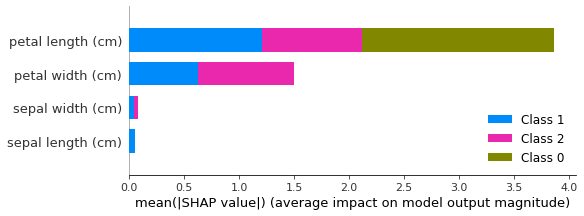

In [17]:
shap.summary_plot(shap_values, X_train)

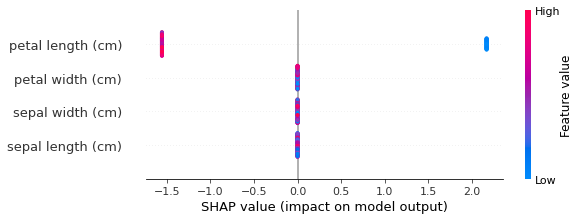

In [19]:
# SHAP值解释
shap.summary_plot(shap_values[0], X_train)
# # 图4
# shap.summary_plot(shap_values[2], X_train)
# shap.summary_plot(shap_values[0], X_train)